import os
job_cancel_str="scancel " + os.environ['SLURM_JOBID']
os.system(job_cancel_str)

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys, os

sys.path.append(os.path.abspath('..'))

In [2]:
# from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import seaborn as sns


from tqdm.notebook import tqdm
from glob import glob

import os

# from itertools import cycle
# from multiprocessing import Pool, cpu_count

import pandas as pd
import numpy as np
import json

In [3]:
cols = json.load(open('/storage/users/g-and-n/plates/columns.json', 'r'))
chans = [c for c in cols.keys() if c not in ['GENERAL', 'MIXED']]
chans

del cols['GENERAL']
del cols['MIXED']

cols['ALL'] = sum(cols.values(), [])

In [4]:
from scipy.stats import pearsonr

# Load Data

In [49]:
map_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/err/*.csv'
raw_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/raw/*.csv'
raw1to1_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/raw1to1/*.csv'

In [50]:
map_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(map_files)])
raw_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(raw_files)])
raw1to1_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(raw1to1_files)])

In [51]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (153370, 596), (146599, 414))

In [52]:
raw_df = raw_df.loc[map_df.index, map_df.columns]

In [53]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (146599, 414), (146599, 414))

In [54]:
map_df = map_df.dropna()
raw_df = raw_df.dropna()
raw1to1_df = raw1to1_df.dropna()

In [55]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (146599, 414), (146454, 414))

In [30]:
from itertools import combinations

In [31]:
cols_pairs = list(combinations(cols['ALL'], 2))
len(cols_pairs)

85491

In [ ]:
json.dump(cols_pairs, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/cols_corr.json', 'w'))

# Calculate Correlation

## Only Treatments

In [ ]:
map_corr = []
raw_corr = []
raw1to1_corr = []
for x, y in tqdm(cols_pairs):
    idx = map_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(map_df[idx][x], map_df[idx][y])
    map_corr.append(prsnr)
    
    idx = raw_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(raw_df[idx][x], raw_df[idx][y])
    raw_corr.append(prsnr)
    
    idx = raw1to1_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(raw1to1_df[idx][x], raw1to1_df[idx][y])
    raw1to1_corr.append(prsnr)

  0%|          | 0/85491 [00:00<?, ?it/s]

In [ ]:
json.dump(map_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr_trt.json', 'w'))
json.dump(raw_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr_trt.json', 'w'))
json.dump(raw1to1_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr_trt.json', 'w'))

## Only Mocks

In [ ]:
map_corr = []
raw_corr = []
raw1to1_corr = []
for x, y in tqdm(cols_pairs):
    idx = map_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(map_df[idx][x], map_df[idx][y])
    map_corr.append(prsnr)
    
    idx = raw_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(raw_df[idx][x], raw_df[idx][y])
    raw_corr.append(prsnr)
    
    idx = raw1to1_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(raw1to1_df[idx][x], raw1to1_df[idx][y])
    raw1to1_corr.append(prsnr)

  0%|          | 0/85491 [00:00<?, ?it/s]

In [ ]:
json.dump(map_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr_mock.json', 'w'))
json.dump(raw_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr_mock.json', 'w'))
json.dump(raw1to1_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr_mock.json', 'w'))

## All Wells

In [ ]:
map_corr = []
raw_corr = []
raw1to1_corr = []
for x, y in tqdm(cols_pairs):
    idx = map_df.index.isin(['mock','treated'], 1)
    prsnr, _ = pearsonr(map_df[idx][x], map_df[idx][y])
    map_corr.append(prsnr)
    
    idx = raw_df.index.isin(['mock','treated'], 1)
    prsnr, _ = pearsonr(raw_df[idx][x], raw_df[idx][y])
    raw_corr.append(prsnr)
    
    idx = raw1to1_df.index.isin(['mock','treated'], 1)
    prsnr, _ = pearsonr(raw1to1_df[idx][x], raw1to1_df[idx][y])
    raw1to1_corr.append(prsnr)

  0%|          | 0/85491 [00:00<?, ?it/s]

In [ ]:
json.dump(map_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr_all.json', 'w'))
json.dump(raw_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr_all.json', 'w'))
json.dump(raw1to1_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr_all.json', 'w'))

# Load Correlation

In [7]:
cols_pairs = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/cols_corr.json', 'r'))

map_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr.json', 'r'))
raw_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr.json', 'r'))
raw1to1_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr.json', 'r'))

In [8]:
map_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr_mock.json', 'r'))
raw_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr_mock.json', 'r'))
raw1to1_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr_mock.json', 'r'))

In [9]:
def create_corr_df(corr_vals):
    mapc = pd.DataFrame(cols_pairs, columns=['col1', 'col2'])
    mapc['corr'] = corr_vals

    mapc2 = pd.DataFrame(cols_pairs, columns=['col2', 'col1'])
    mapc2['corr'] = corr_vals
    mapc = pd.concat([mapc, mapc2])

    pt = mapc.pivot('col1', 'col2', 'corr')
    pt.fillna(1, inplace=True)
    
    return pt

In [10]:
map_df = create_corr_df(map_corr)
raw_df = create_corr_df(raw_corr)
raw1to1_df = create_corr_df(raw1to1_corr)

# Plot

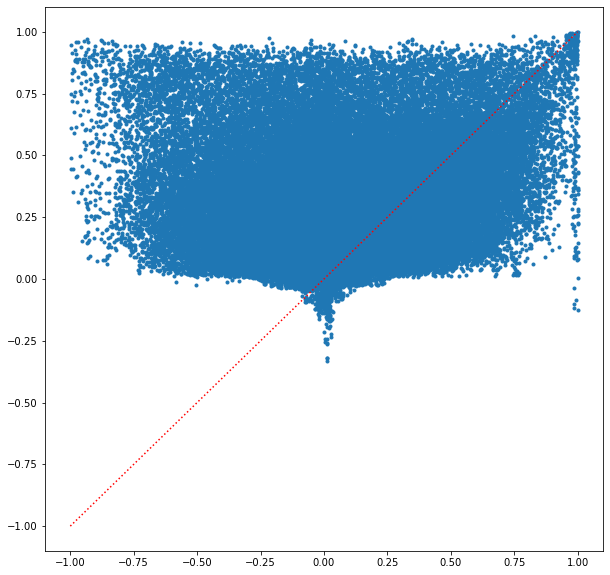

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.plot(raw_corr, map_corr, '.')
_ = ax.plot([-1,1], [-1,1], 'r:')

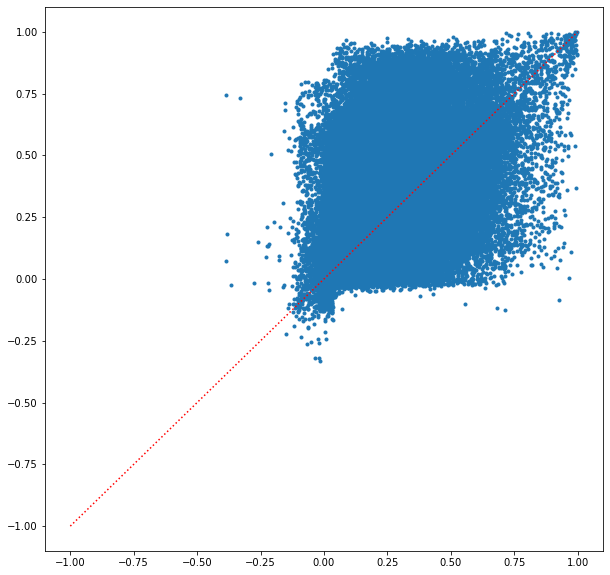

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.plot(raw1to1_corr, map_corr, '.')
_ = ax.plot([-1,1], [-1,1], 'r:')

# Heatmap

In [20]:
def create_heatmap(corr_df, title=''):
    fig, ax = plt.subplots(figsize=(15,15))
    _ = sns.heatmap(data=corr_df.loc[cols['ALL'], cols['ALL']], vmin=-1, vmax=1, ax=ax)
    ax.set_title(title, fontsize=20)

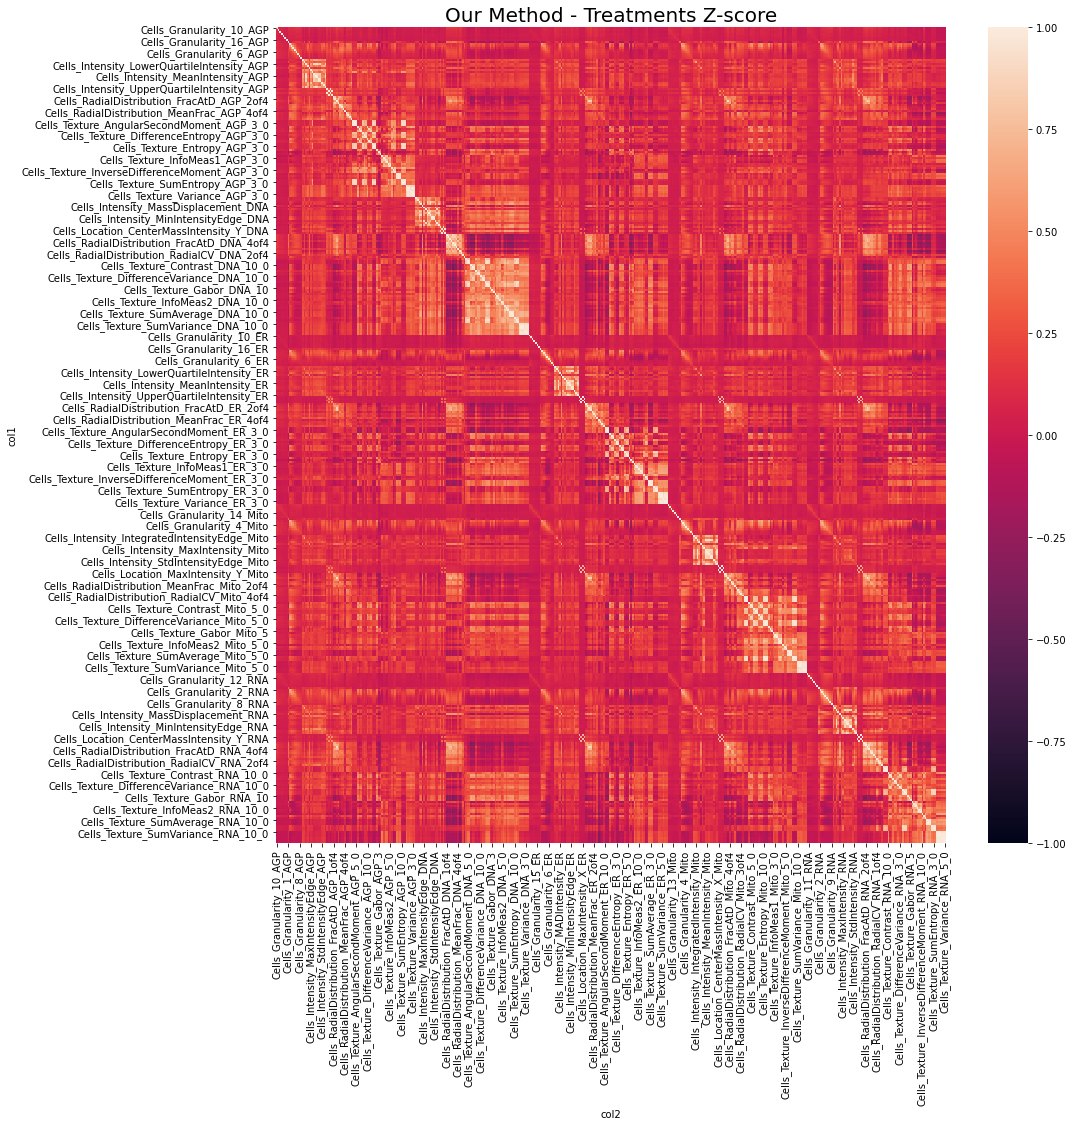

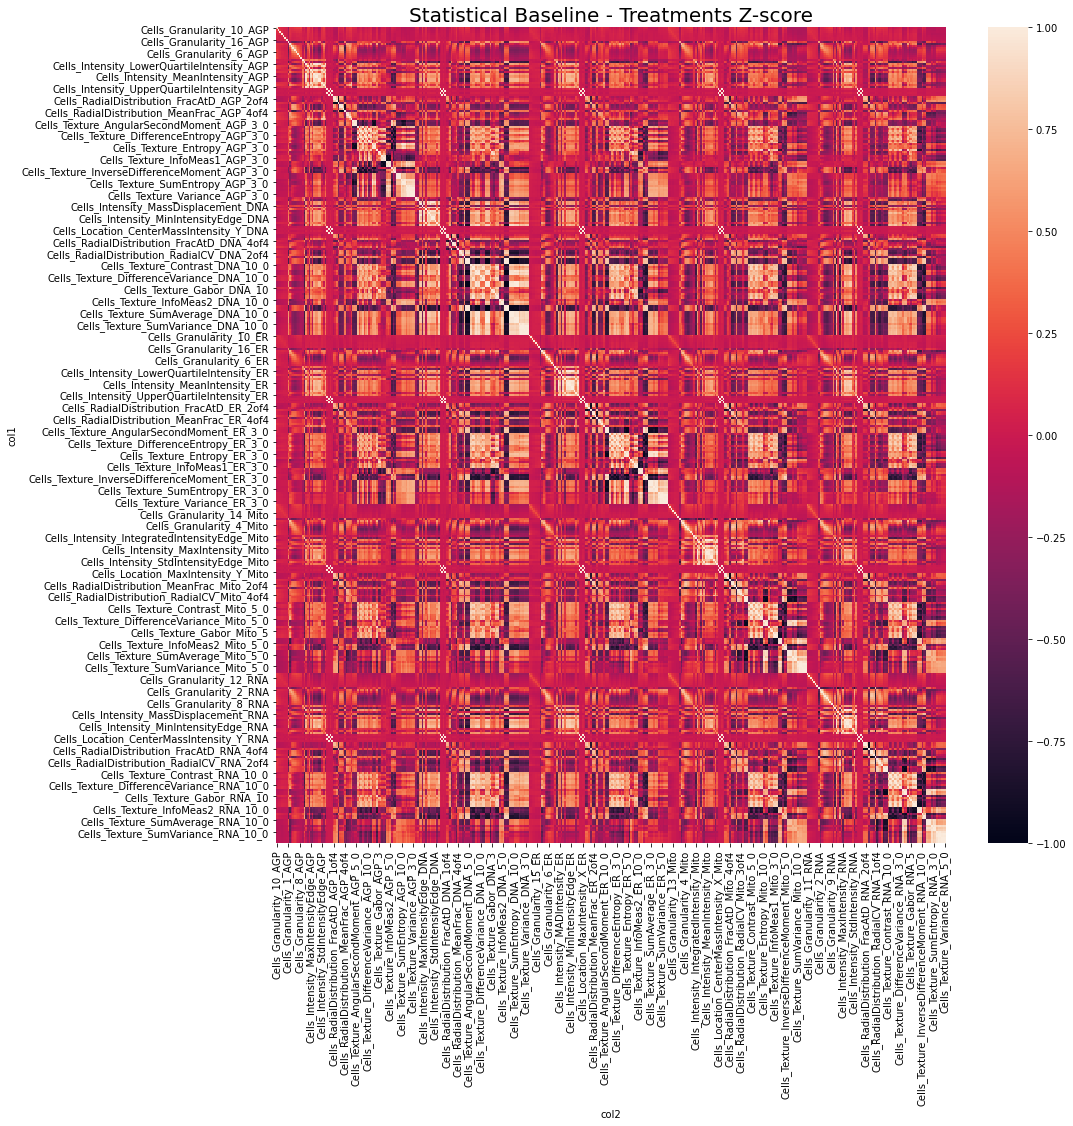

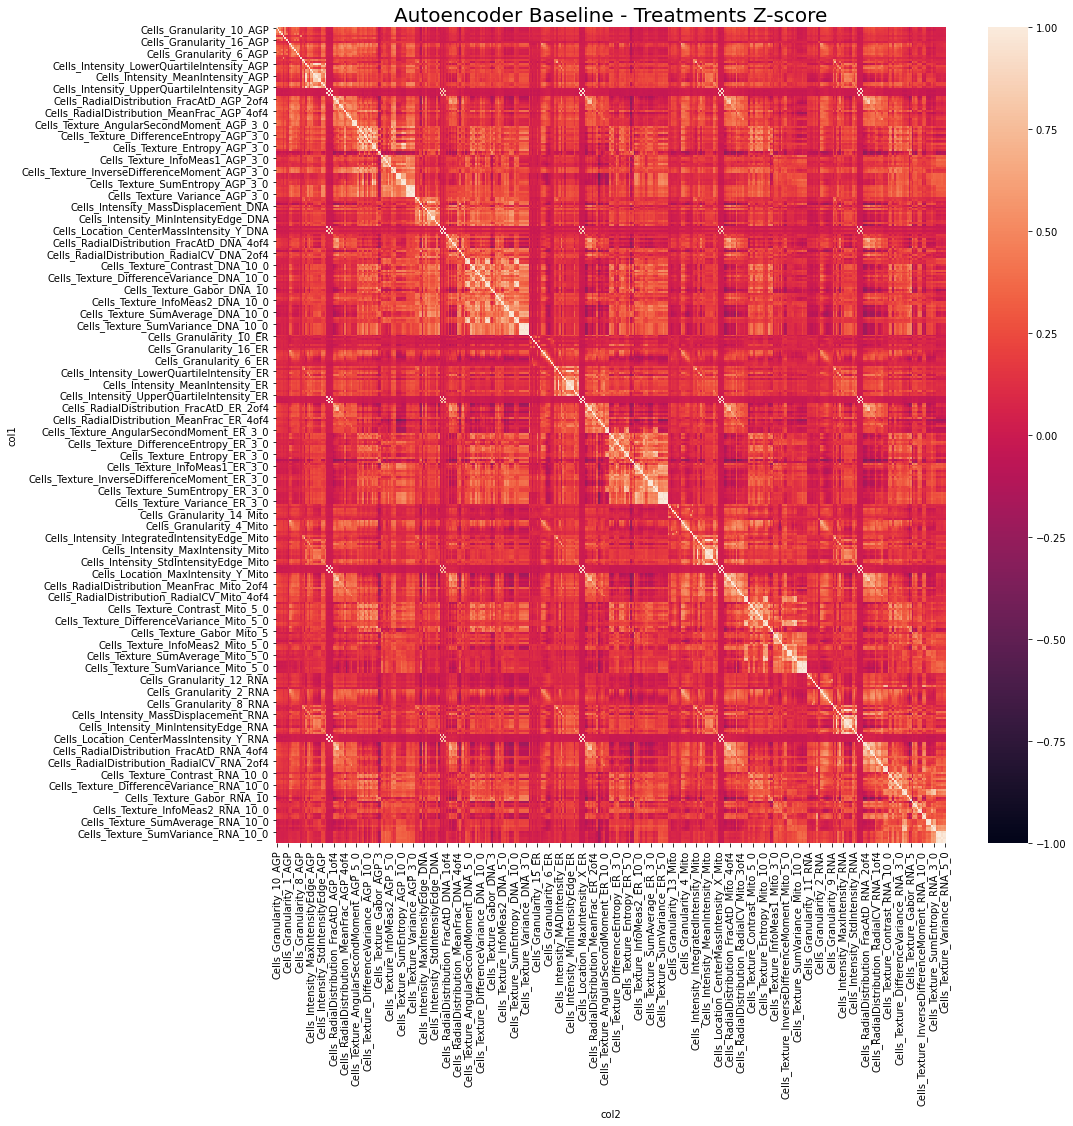

In [21]:
create_heatmap(map_df, 'Our Method - Treatments Z-score')
create_heatmap(raw_df, 'Statistical Baseline - Treatments Z-score')
create_heatmap(raw1to1_df, 'Autoencoder Baseline - Treatments Z-score')

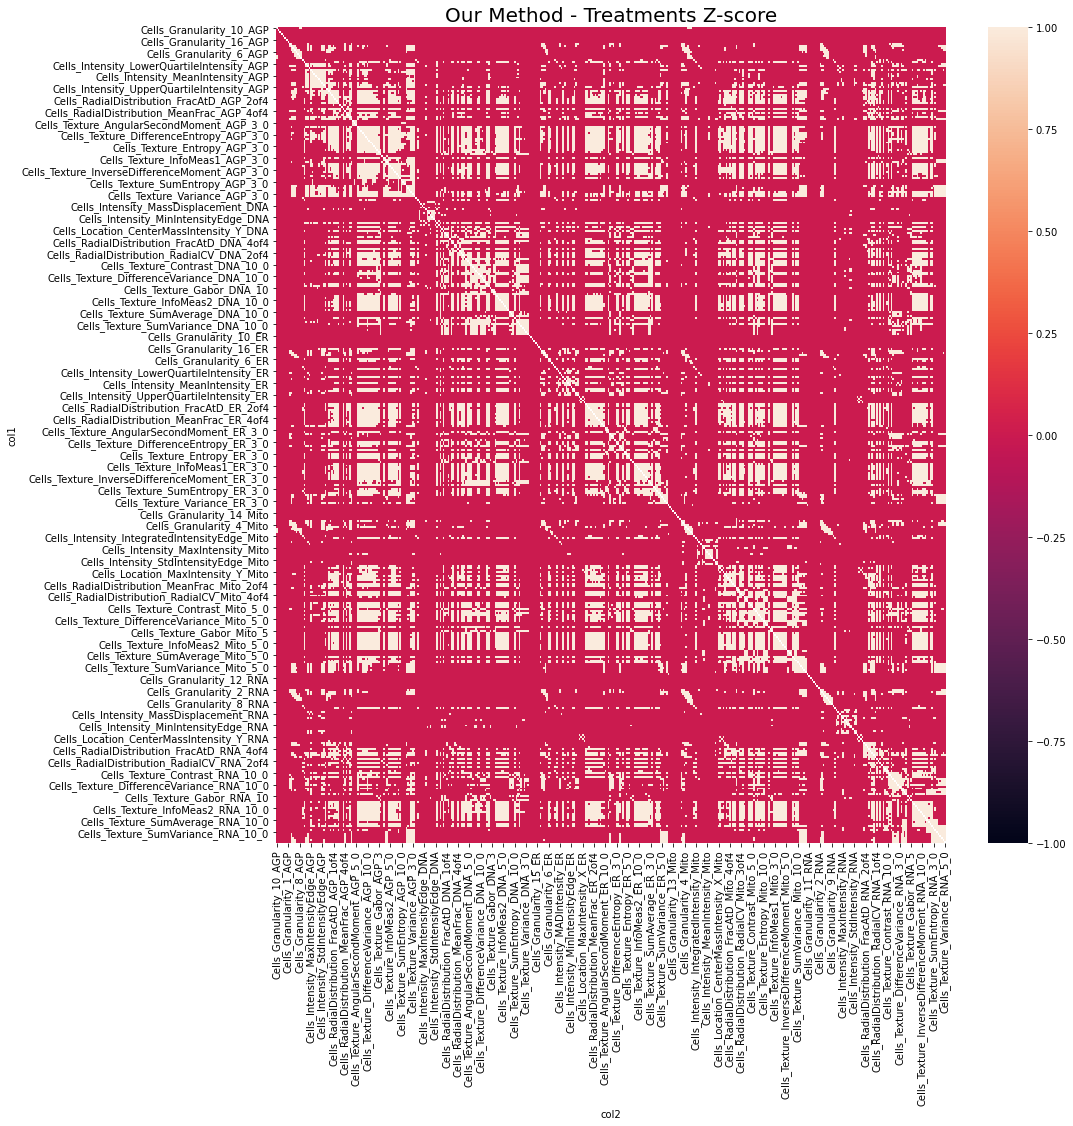

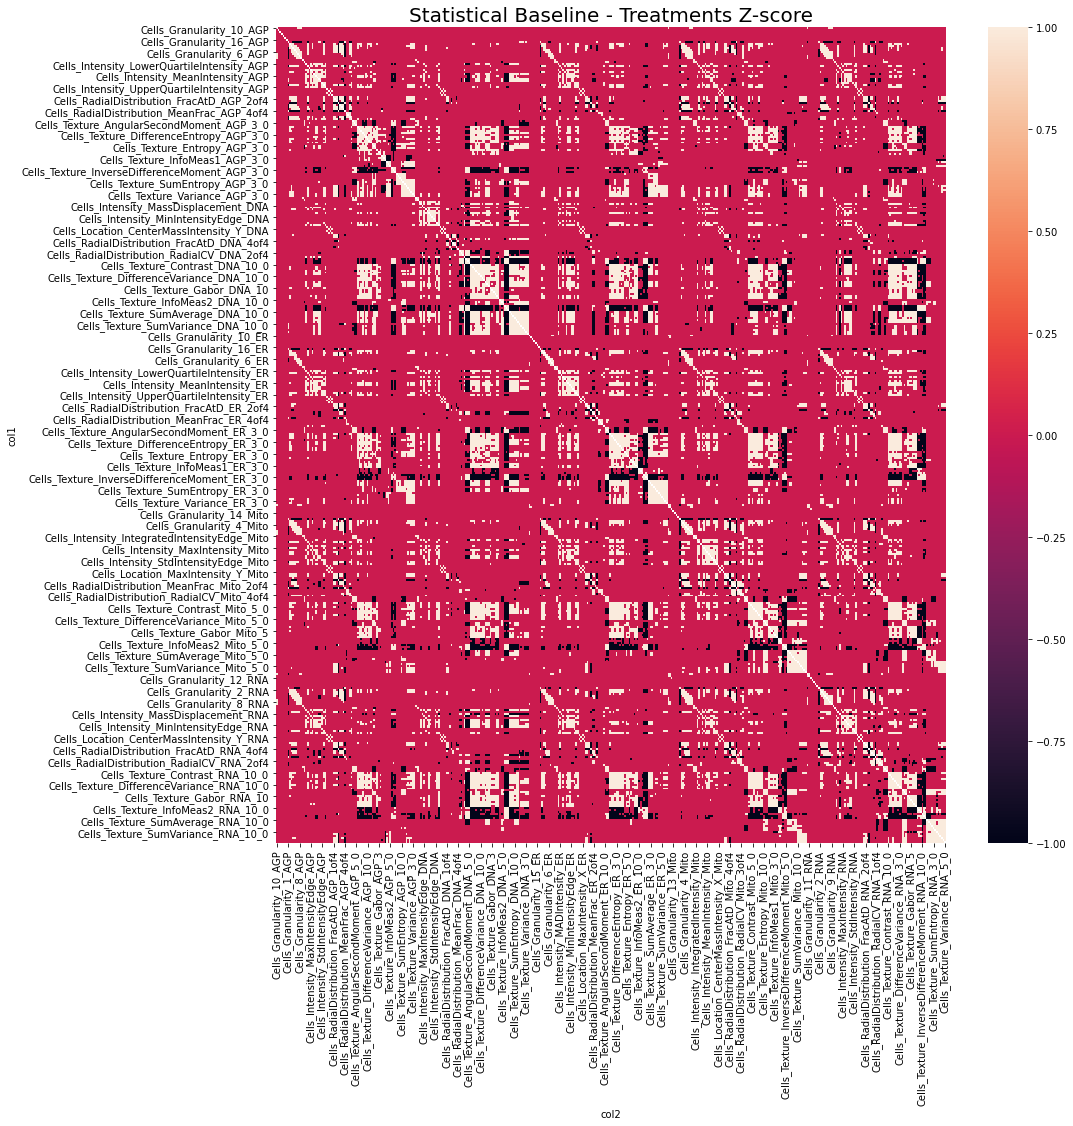

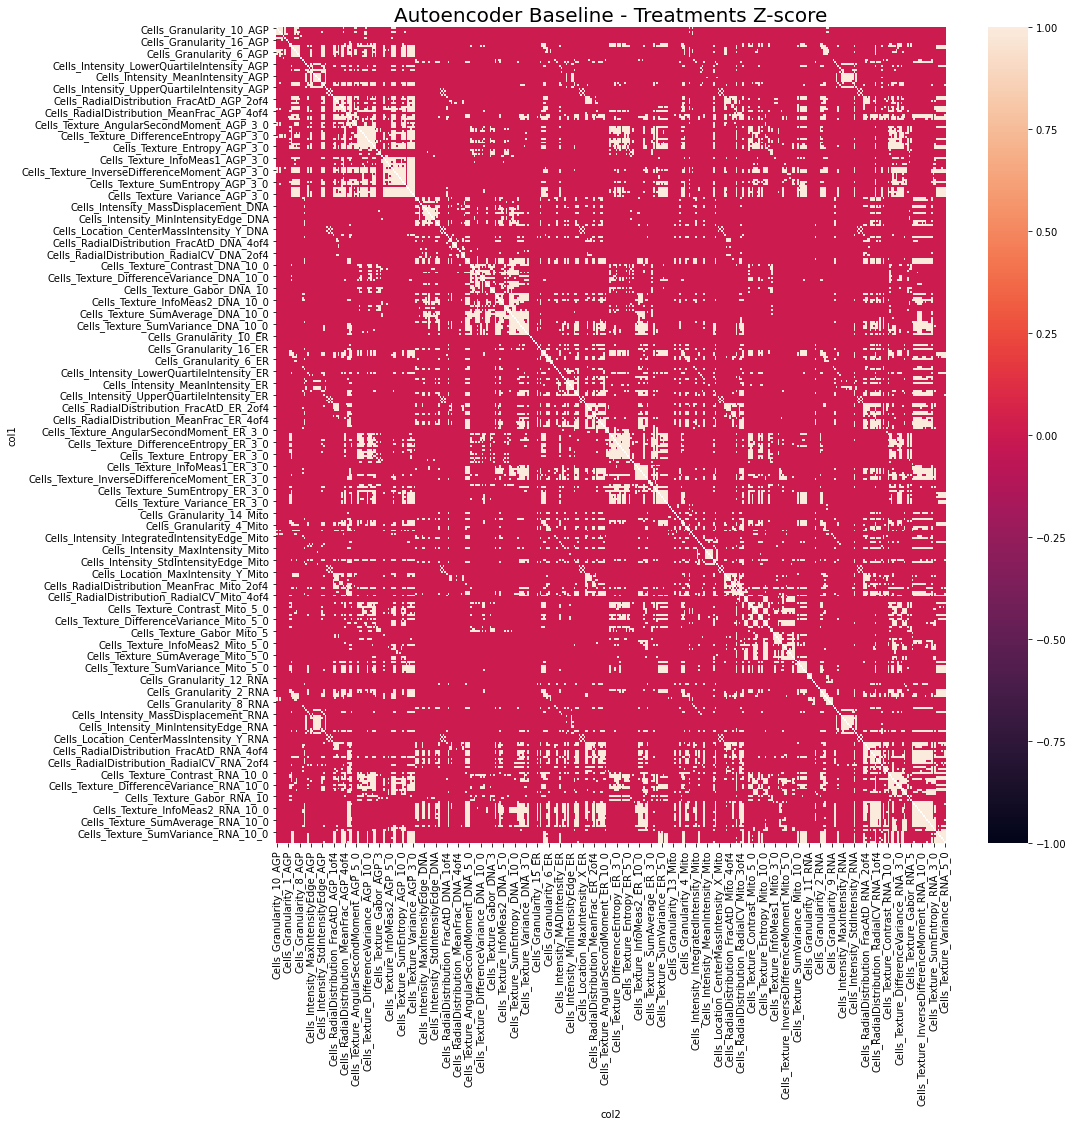

In [59]:
create_heatmap([round(c, 0) for c in map_corr], cols_pairs, 'Our Method - Treatments Z-score')
create_heatmap([round(c, 0) for c in raw_corr], cols_pairs, 'Statistical Baseline - Treatments Z-score')
create_heatmap([round(c, 0) for c in raw1to1_corr], cols_pairs, 'Autoencoder Baseline - Treatments Z-score')

In [22]:
raw_df

col2                             Cells_Granularity_10_AGP  \
col1                                                        
Cells_Granularity_10_AGP                         1.000000   
Cells_Granularity_10_ER                          0.108611   
Cells_Granularity_10_Mito                        0.184430   
Cells_Granularity_10_RNA                         0.154292   
Cells_Granularity_11_AGP                         0.167886   
...                                                   ...   
Cells_Texture_Variance_Mito_3_0                 -0.152426   
Cells_Texture_Variance_Mito_5_0                 -0.151661   
Cells_Texture_Variance_RNA_10_0                 -0.068505   
Cells_Texture_Variance_RNA_3_0                  -0.073798   
Cells_Texture_Variance_RNA_5_0                  -0.071876   

col2                             Cells_Granularity_10_ER  \
col1                                                       
Cells_Granularity_10_AGP                        0.108611   
Cells_Granularity_10_ER                         1.000000   
Cells_Granularity_10_Mito                       0.347930   
Cells_Granularity_10_RNA                        0.300143   
Cells_Granularity_11_AGP                        0.097578   
...                                                  ...   
Cells_Texture_Variance_Mito_3_0                 0.058337   
Cells_Texture_Variance_Mito_5_0                 0.057576   
Cells_Texture_Variance_RNA_10_0                 0.062982   
Cells_Texture_Variance_RNA_3_0                  0.065049   
Cells_Texture_Variance_RNA_5_0                  0.064101   

col2                             Cells_Granularity_10_Mito  \
col1                                                         
Cells_Granularity_10_AGP                          0.184430   
Cells_Granularity_10_ER                           0.347930   
Cells_Granularity_10_Mito                         1.000000   
Cells_Granularity_10_RNA                          0.399864   
Cells_Granularity_11_AGP                          0.142752   
...                                                    ...   
Cells_Texture_Variance_Mito_3_0                   0.041094   
Cells_Texture_Variance_Mito_5_0                   0.041993   
Cells_Texture_Variance_RNA_10_0                   0.088780   
Cells_Texture_Variance_RNA_3_0                    0.087723   
Cells_Texture_Variance_RNA_5_0                    0.087574   

col2                             Cells_Granularity_10_RNA  \
col1                                                        
Cells_Granularity_10_AGP                         0.154292   
Cells_Granularity_10_ER                          0.300143   
Cells_Granularity_10_Mito                        0.399864   
Cells_Granularity_10_RNA                         1.000000   
Cells_Granularity_11_AGP                         0.124777   
...                                                   ...   
Cells_Texture_Variance_Mito_3_0                 -0.023696   
Cells_Texture_Variance_Mito_5_0                 -0.019430   
Cells_Texture_Variance_RNA_10_0                  0.047118   
Cells_Texture_Variance_RNA_3_0                   0.040145   
Cells_Texture_Variance_RNA_5_0                   0.040940   

col2                             Cells_Granularity_11_AGP  \
col1                                                        
Cells_Granularity_10_AGP                         0.167886   
Cells_Granularity_10_ER                          0.097578   
Cells_Granularity_10_Mito                        0.142752   
Cells_Granularity_10_RNA                         0.124777   
Cells_Granularity_11_AGP                         1.000000   
...                                                   ...   
Cells_Texture_Variance_Mito_3_0                 -0.143096   
Cells_Texture_Variance_Mito_5_0                 -0.142656   
Cells_Texture_Variance_RNA_10_0                 -0.071553   
Cells_Texture_Variance_RNA_3_0                  -0.077834   
Cells_Texture_Variance_RNA_5_0                  -0.076015   

col2                          

In [15]:
for chan, colms in cols.items():
    print(chan, len(colms))

AGP 86
DNA 70
ER 86
Mito 86
RNA 86
ALL 414


In [16]:
col_names = [c.replace('AGP', '?') for c in cols['AGP']]

In [17]:
from itertools import combinations

In [18]:
chan_pairs = list(combinations([c for c in cols.keys() if c != 'ALL'], 2))
len(chan_pairs), chan_pairs

(10,
 [('AGP', 'DNA'),
  ('AGP', 'ER'),
  ('AGP', 'Mito'),
  ('AGP', 'RNA'),
  ('DNA', 'ER'),
  ('DNA', 'Mito'),
  ('DNA', 'RNA'),
  ('ER', 'Mito'),
  ('ER', 'RNA'),
  ('Mito', 'RNA')])

In [27]:
def display_corr_by_chans(corr_df, title=''):
    for c1, c2 in chan_pairs:
        if 'DNA' in c1+c2:
            df = corr_df.loc[[c.replace('?', c1) for c in col_names if 'Granularity' not in c], [c.replace('?', c2) for c in col_names if 'Granularity' not in c]]
        else:
            df = corr_df.loc[[c.replace('?', c1) for c in col_names], [c.replace('?', c2) for c in col_names]]
                    
        fig, ax = plt.subplots(figsize=(18,15), facecolor='white')
        _ = sns.heatmap(data=df, vmin=-1, vmax=1, ax=ax, cbar=False)
        ax.set_title(title + f' - {c1}~{c2}', fontsize=20)

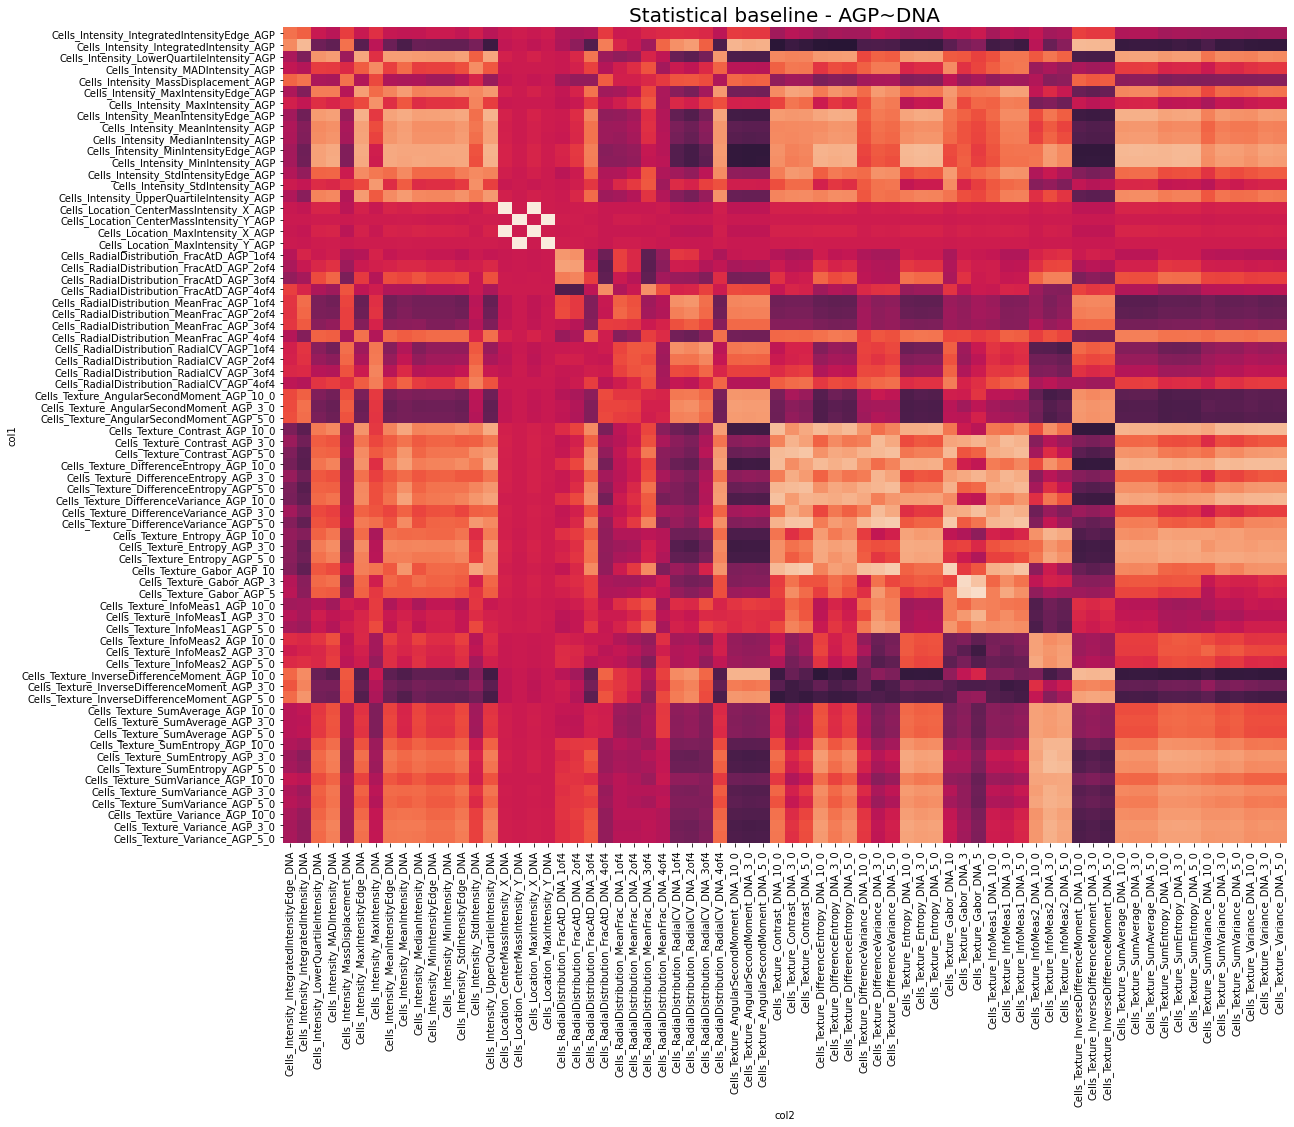

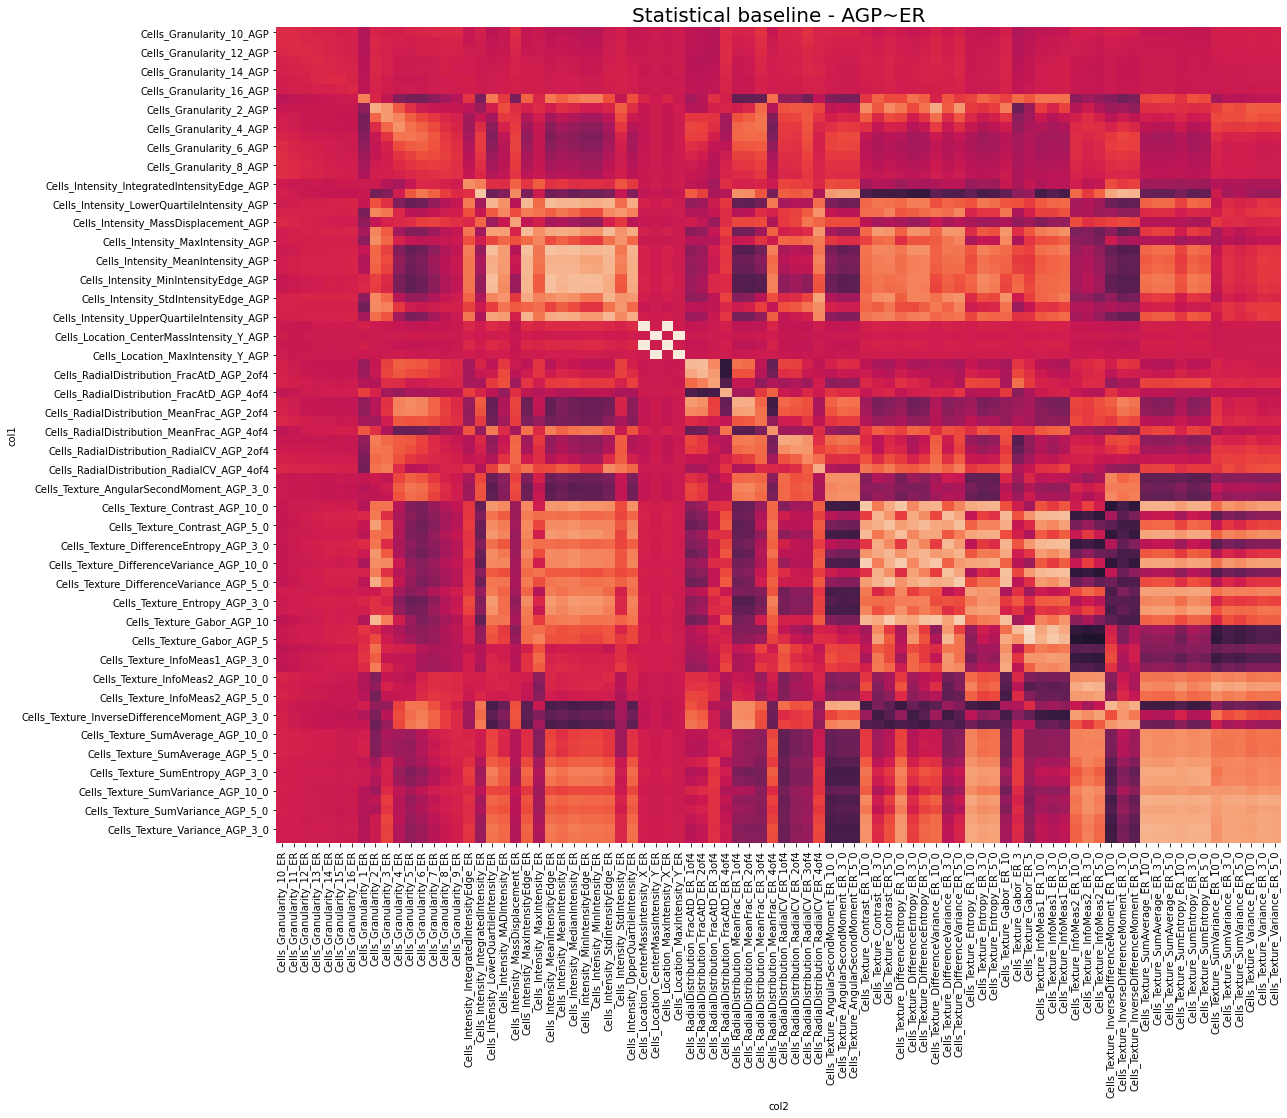

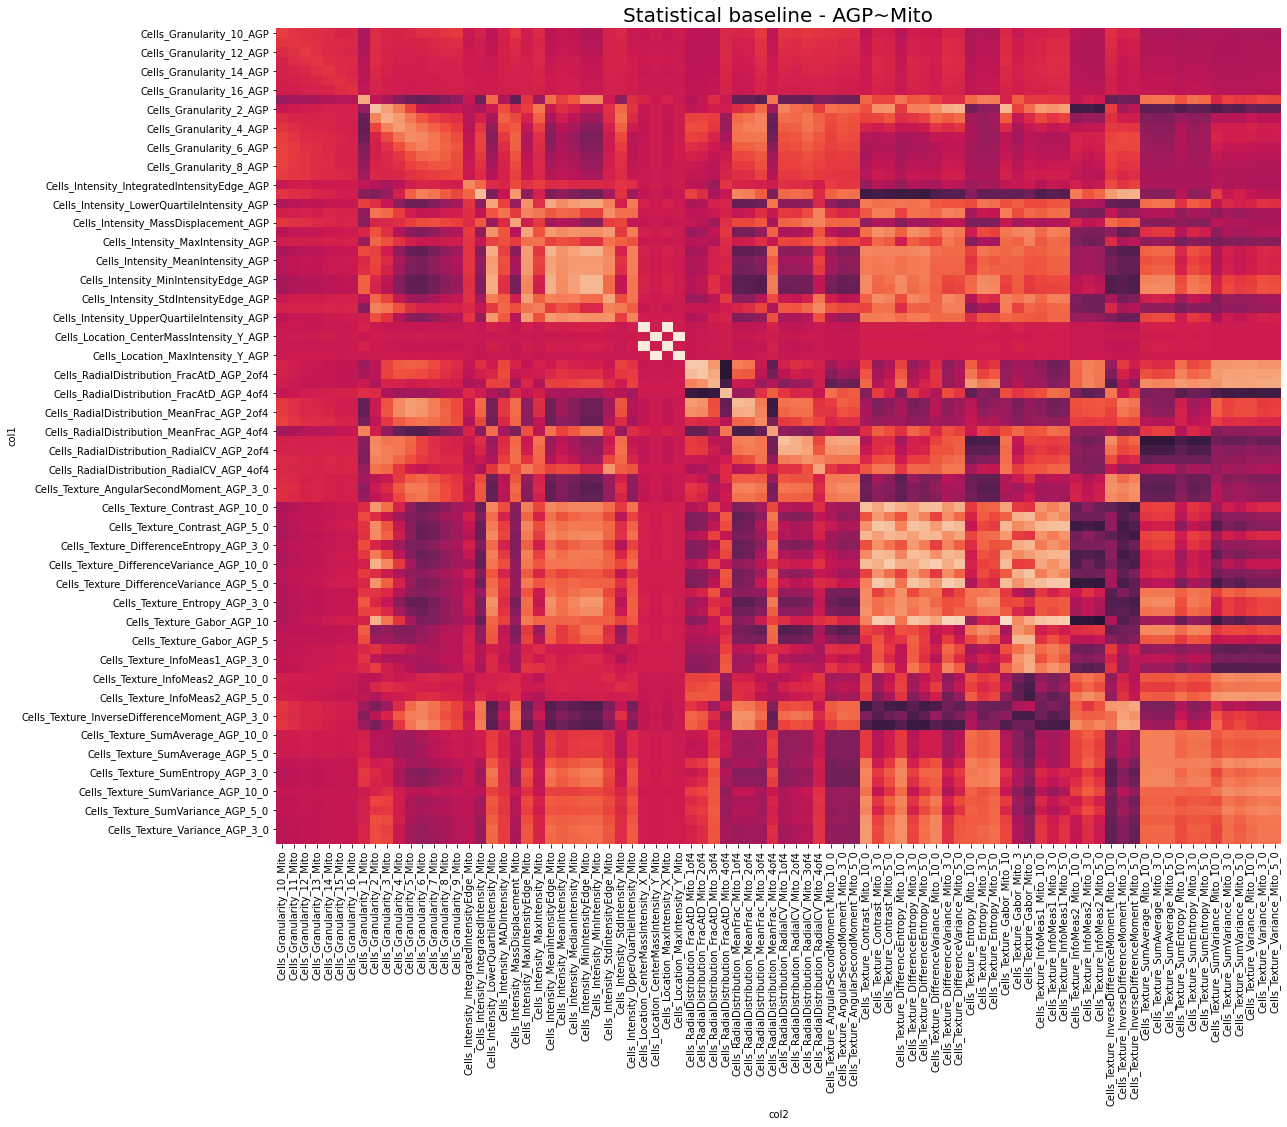

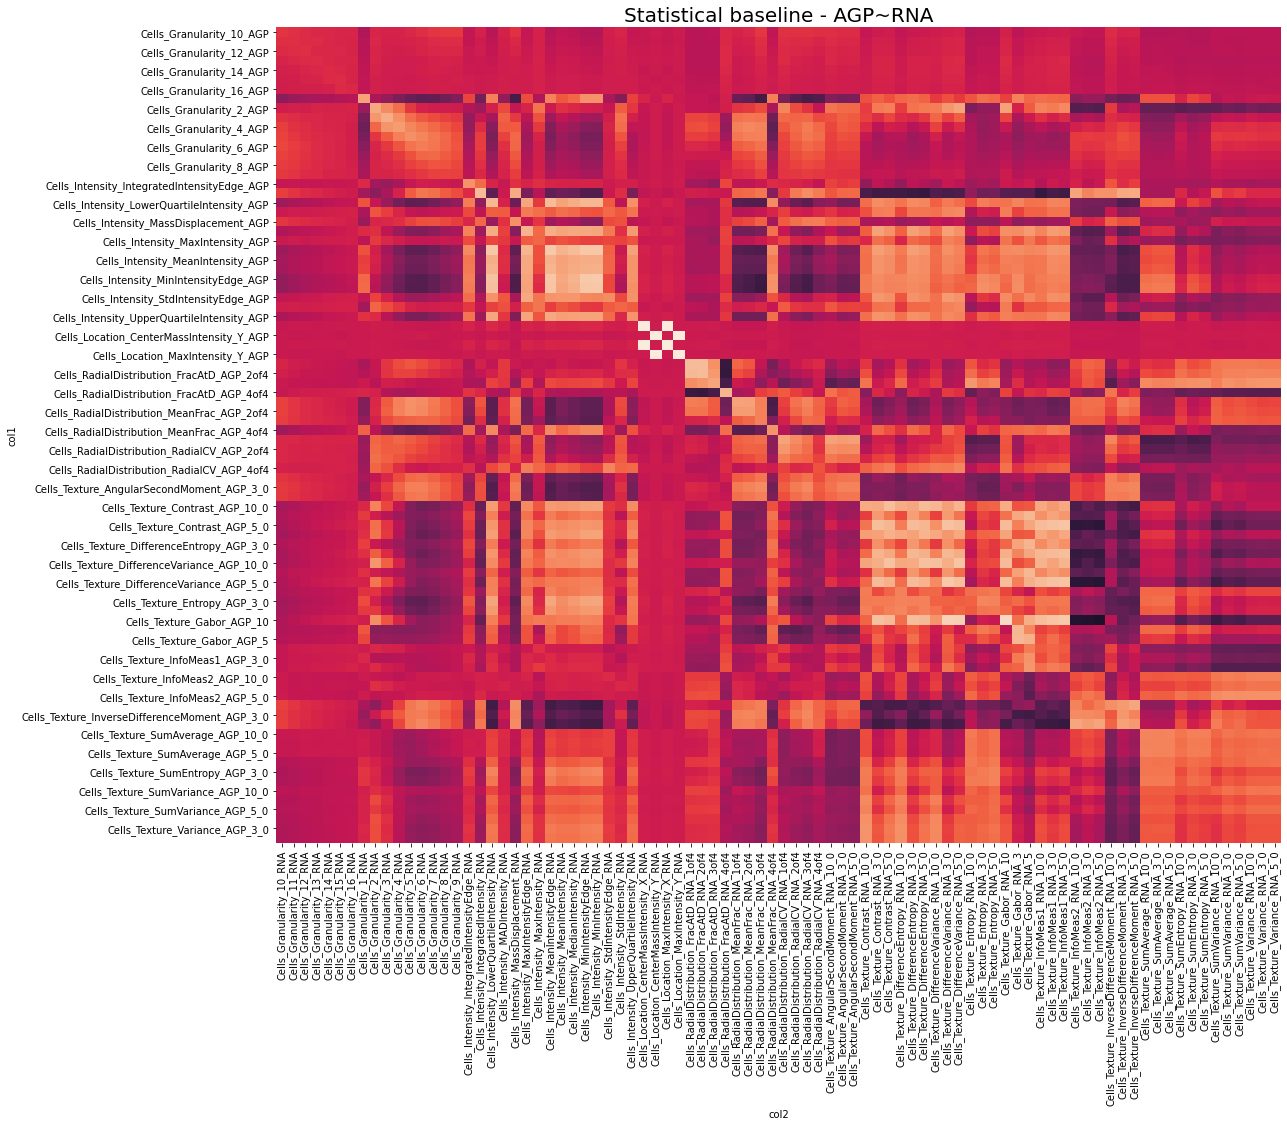

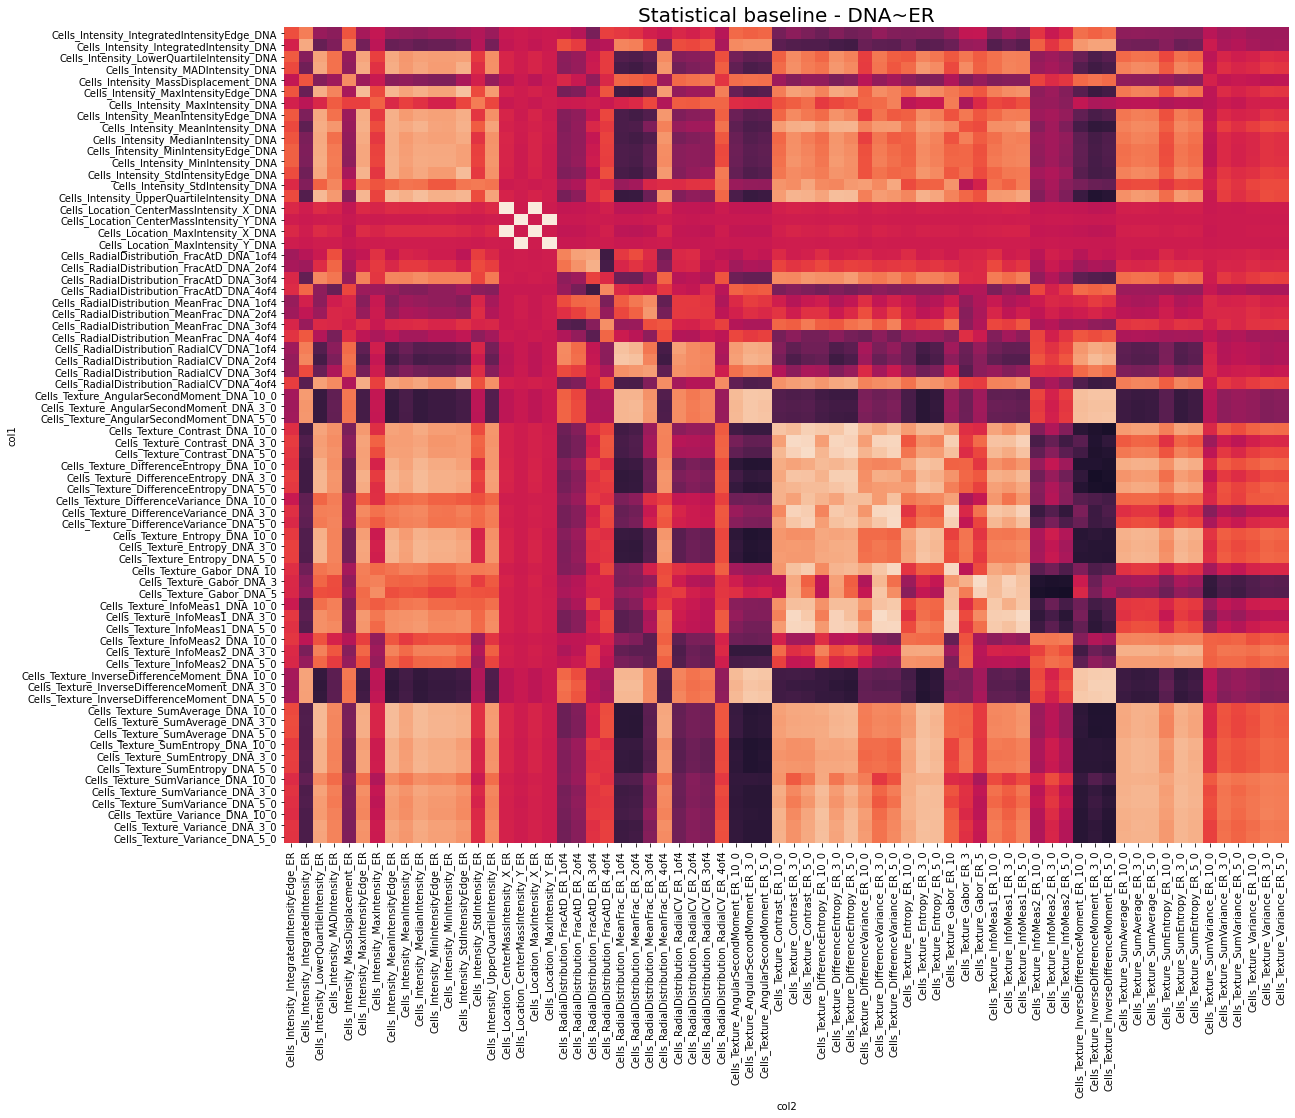

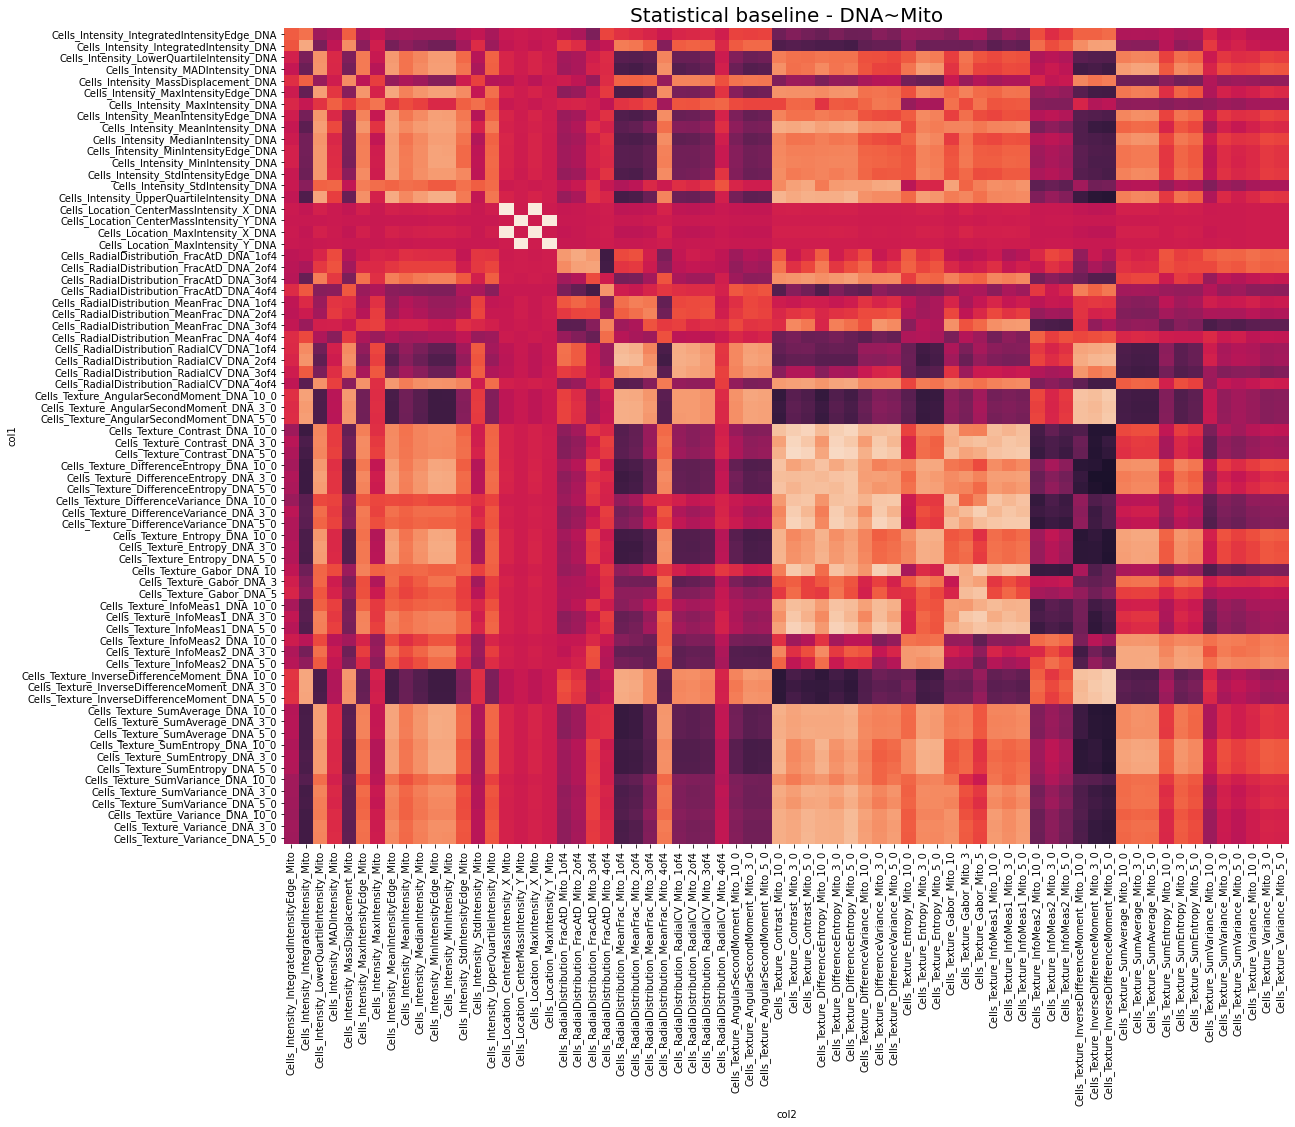

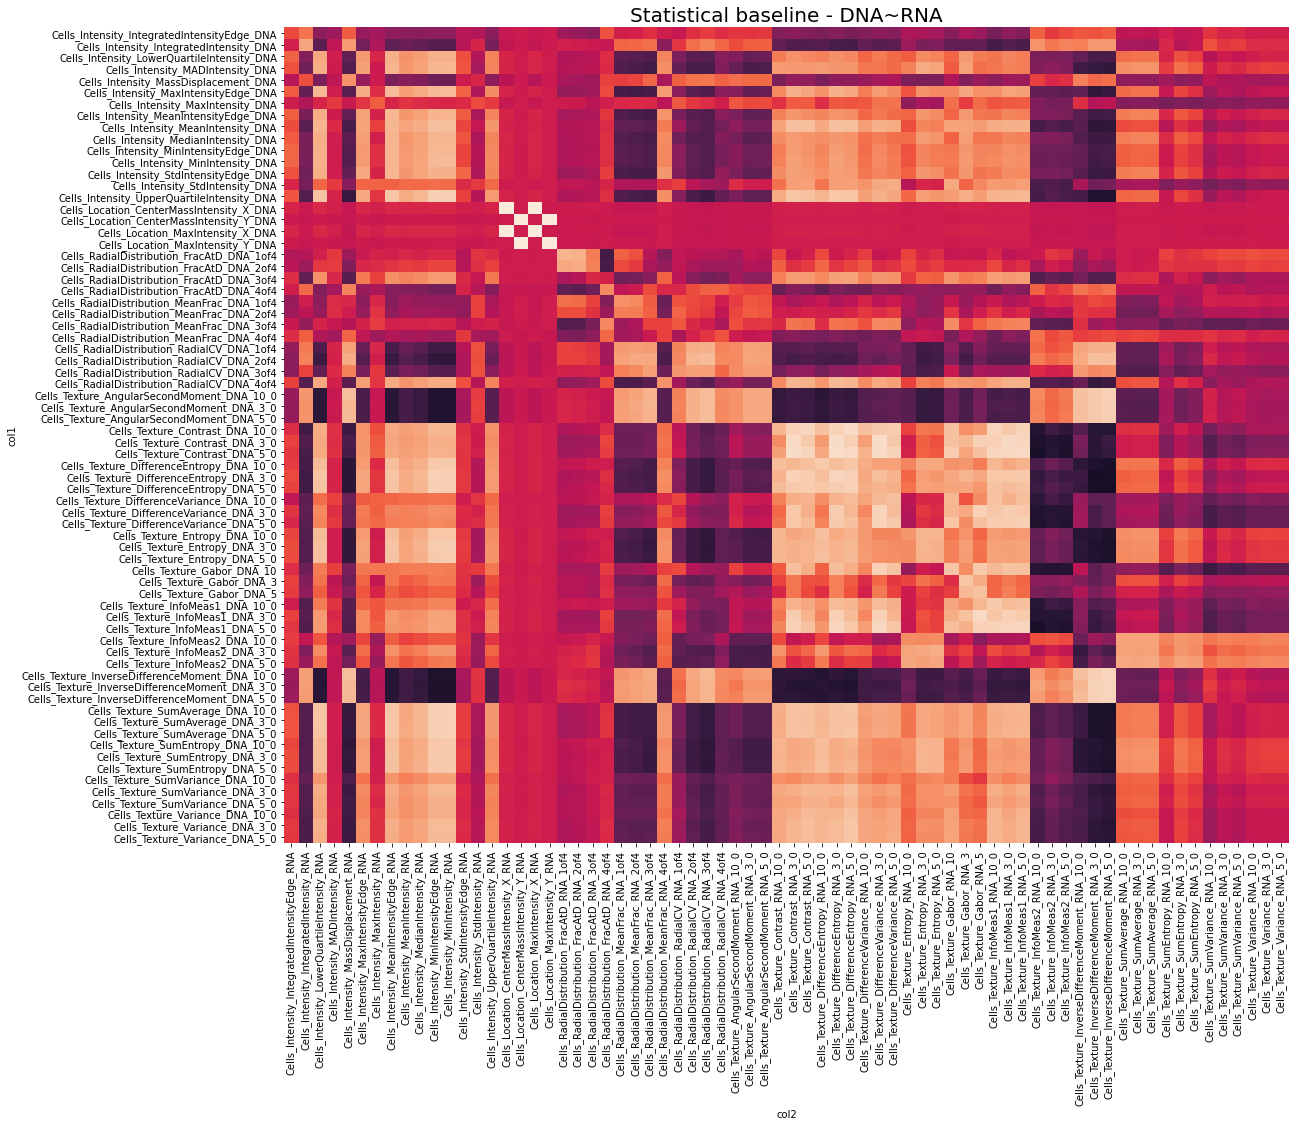

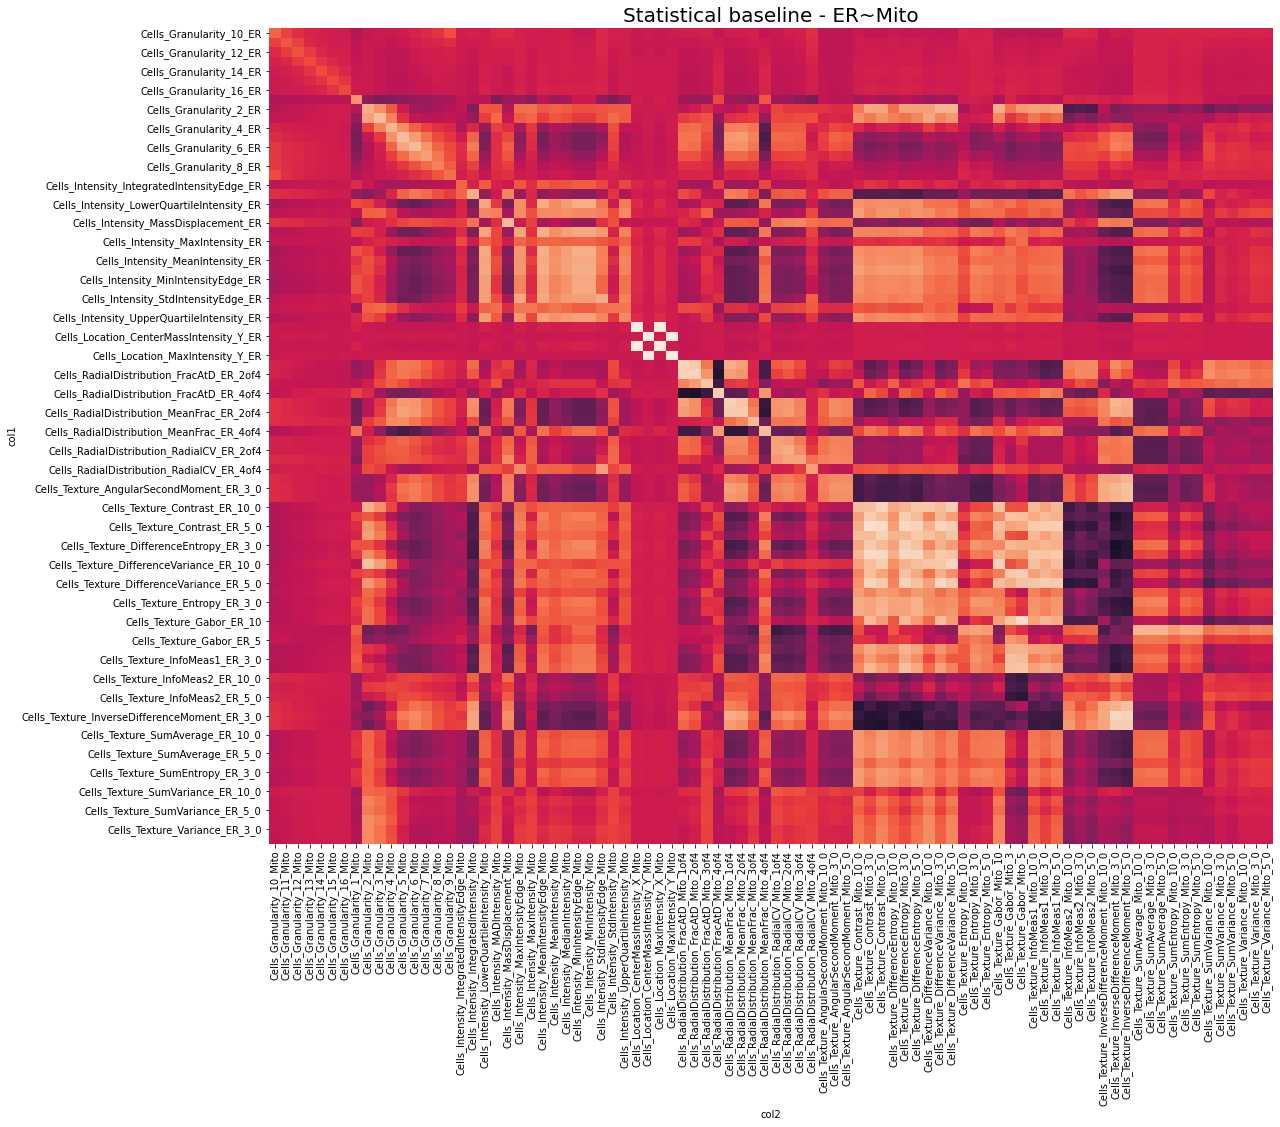

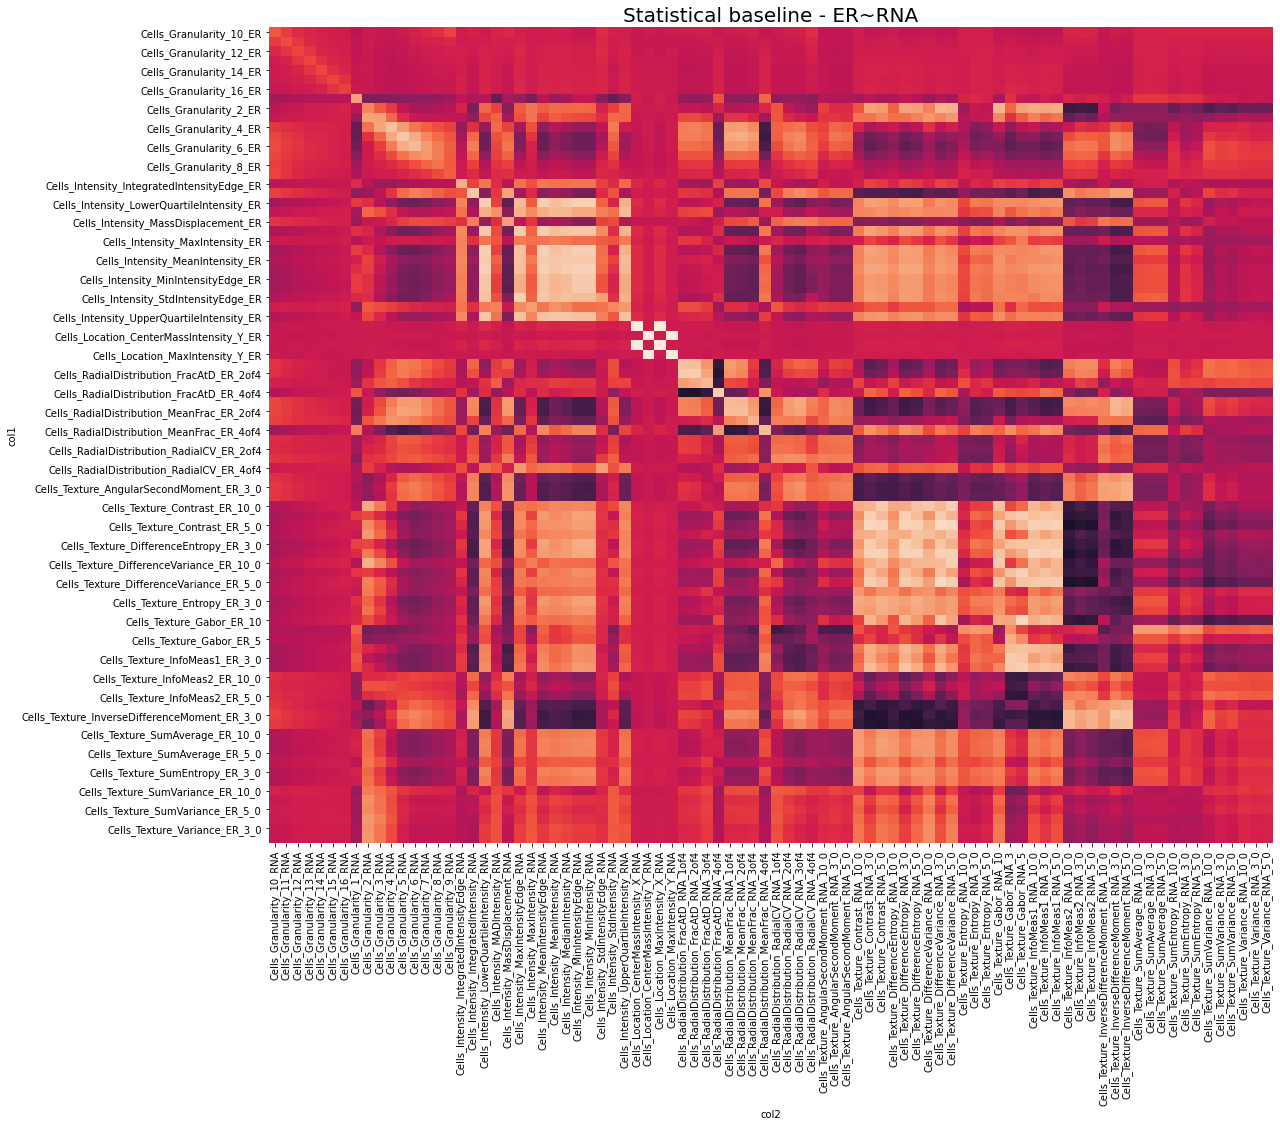

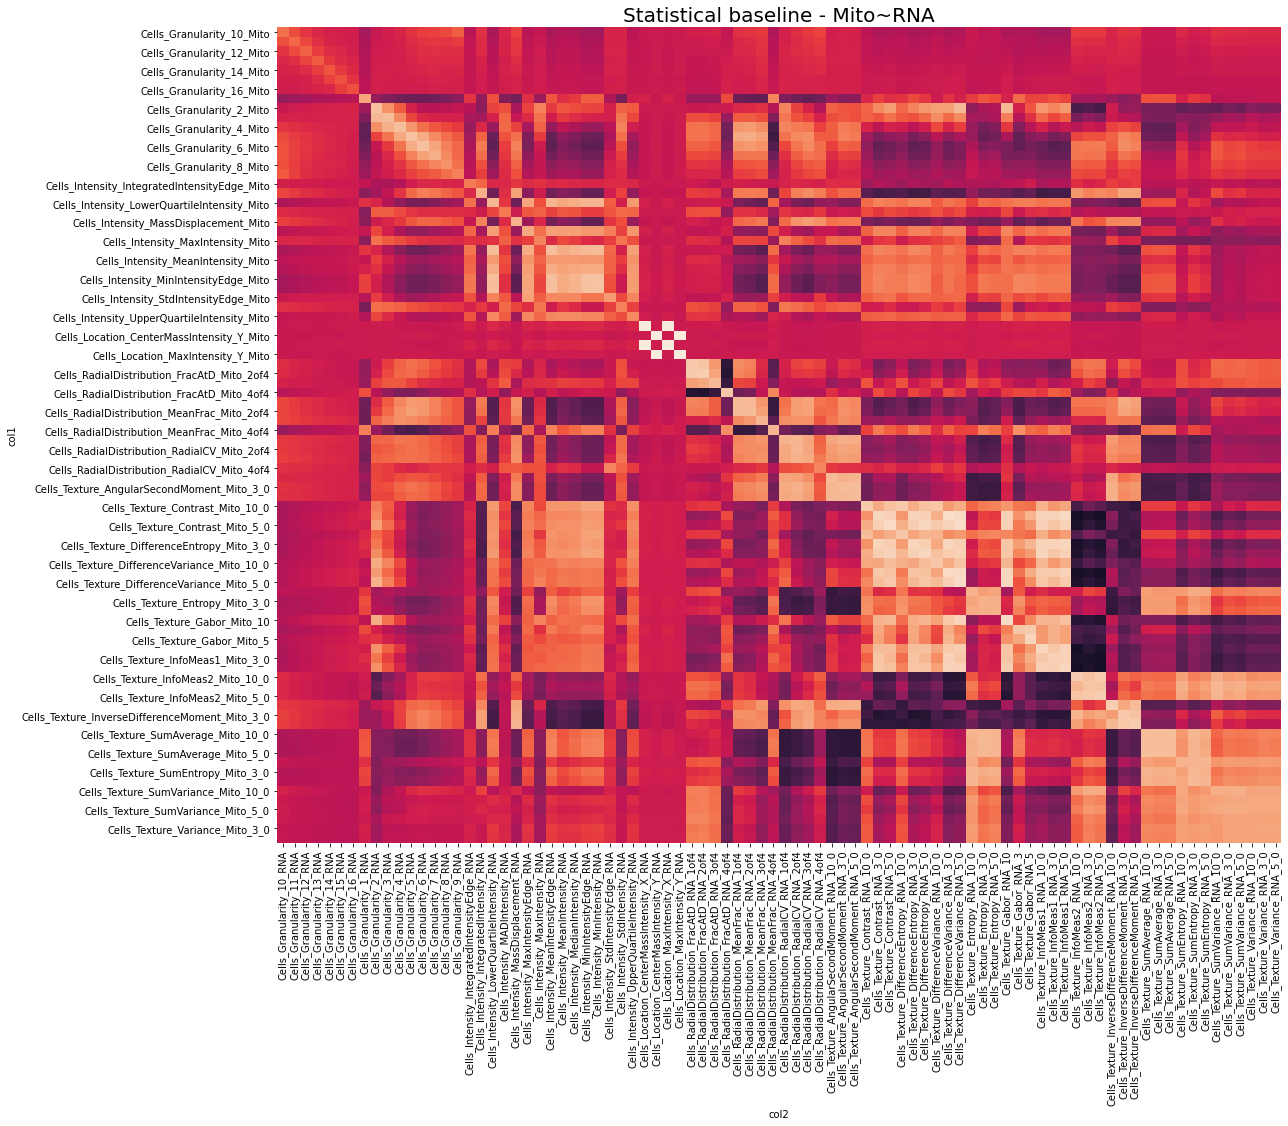

In [28]:
display_corr_by_chans(raw_df, title='Statistical baseline')

In [19]:
corr_df = pd.DataFrame()

for c1, c2 in chan_pairs:
    if 'DNA' in c1+c2:
        df = raw_df.loc[[c.replace('?', c1) for c in col_names if 'Granularity' not in c], [c.replace('?', c2) for c in col_names if 'Granularity' not in c]]
    else:
        df = raw_df.loc[[c.replace('?', c1) for c in col_names], [c.replace('?', c2) for c in col_names]]
        
    corr = np.diag(df).mean()
    corr_df.loc[c1, c2] = corr
    corr_df.loc[c2, c1] = corr

for c in cols.keys():
    if c != 'ALL':
        corr_df.loc[c, c] = 1

In [20]:
chans = [c for c in cols.keys() if c != 'ALL']
corr_df = corr_df.loc[chans, chans]

In [33]:
pd.Series(np.diag(df), index=[df.index, df.columns])

col1                                col2                             
Cells_Granularity_10_Mito           Cells_Granularity_10_RNA             0.399864
Cells_Granularity_11_Mito           Cells_Granularity_11_RNA             0.363355
Cells_Granularity_12_Mito           Cells_Granularity_12_RNA             0.336902
Cells_Granularity_13_Mito           Cells_Granularity_13_RNA             0.313644
Cells_Granularity_14_Mito           Cells_Granularity_14_RNA             0.285703
                                                                           ...   
Cells_Texture_SumVariance_Mito_3_0  Cells_Texture_SumVariance_RNA_3_0    0.663593
Cells_Texture_SumVariance_Mito_5_0  Cells_Texture_SumVariance_RNA_5_0    0.674798
Cells_Texture_Variance_Mito_10_0    Cells_Texture_Variance_RNA_10_0      0.634241
Cells_Texture_Variance_Mito_3_0     Cells_Texture_Variance_RNA_3_0       0.645661
Cells_Texture_Variance_Mito_5_0     Cells_Texture_Variance_RNA_5_0       0.637901
Length: 86, dtype: float64

In [30]:
corr_df

AGP       DNA        ER      Mito       RNA
AGP   1.000000  0.572036  0.594590  0.553713  0.511795
DNA   0.572036  1.000000  0.642449  0.551218  0.540772
ER    0.594590  0.642449  1.000000  0.555196  0.558348
Mito  0.553713  0.551218  0.555196  1.000000  0.711465
RNA   0.511795  0.540772  0.558348  0.711465  1.000000

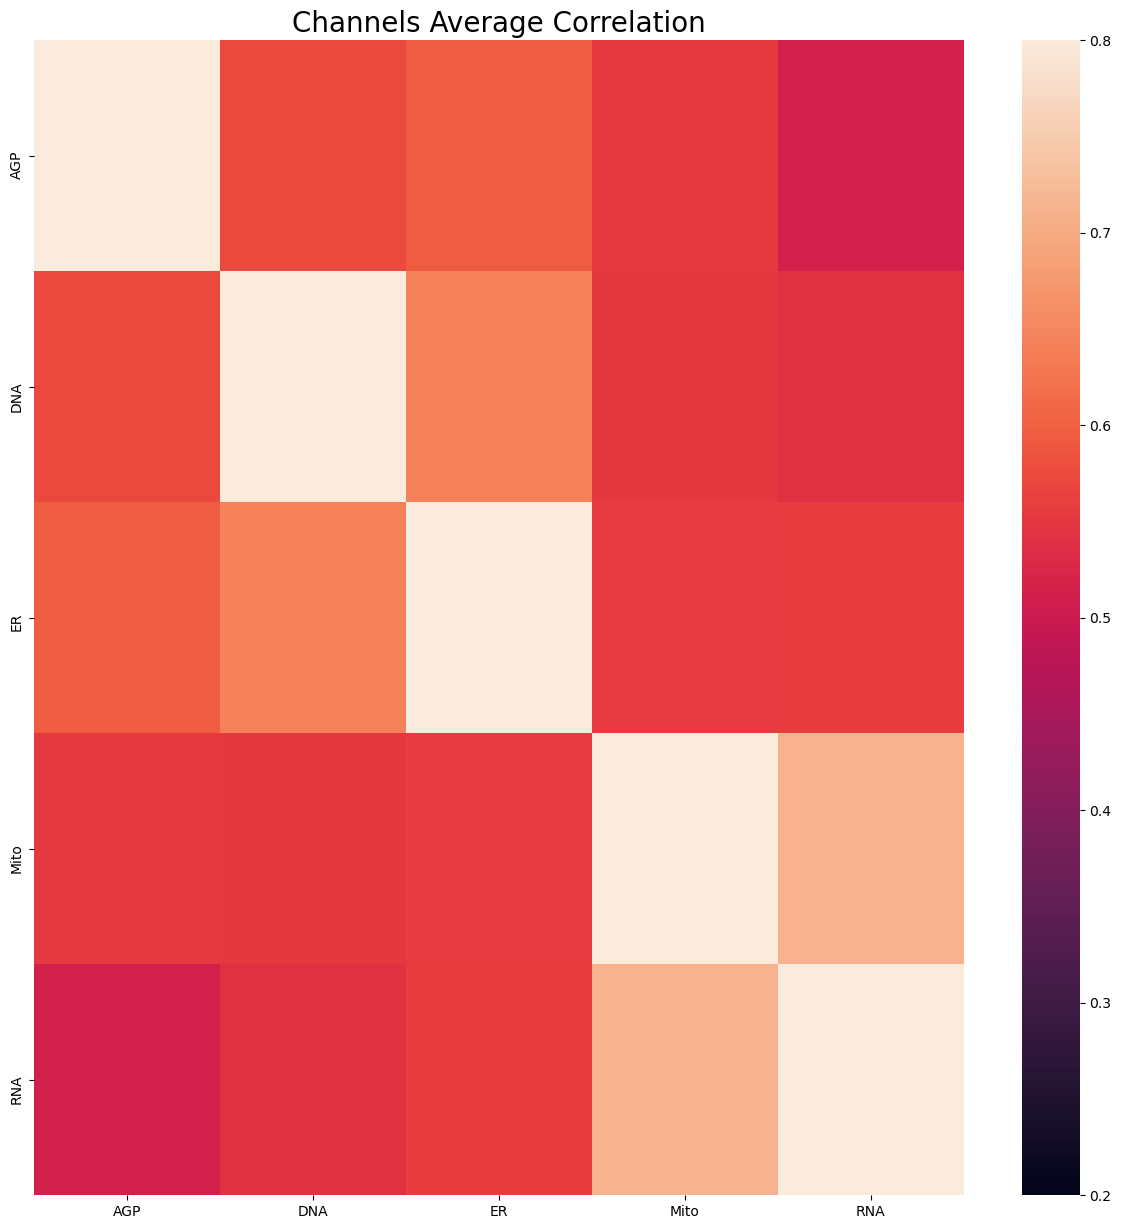

In [35]:
fig, ax = plt.subplots(figsize=(15,15), facecolor='white')
_ = sns.heatmap(data=corr_df, vmin=0.2, vmax=0.8, ax=ax)
ax.set_title('Channels Average Correlation', fontsize=20)
fig.savefig(f'/sise/assafzar-group/g-and-n/tabular_models_results/plots/correlations.eps', format='eps')

In [44]:
corr_df = pd.DataFrame()

for c1, c2 in chan_pairs:
    if 'DNA' in c1+c2:
        df = map_df.loc[[c.replace('?', c1) for c in col_names if 'Granularity' not in c], [c.replace('?', c2) for c in col_names if 'Granularity' not in c]]
    else:
        df = map_df.loc[[c.replace('?', c1) for c in col_names], [c.replace('?', c2) for c in col_names]]
        
    corr = np.diag(df).mean()
    corr_df.loc[c1, c2] = corr
    corr_df.loc[c2, c1] = corr

for c in cols.keys():
    if c != 'ALL':
        corr_df.loc[c, c] = 1

In [45]:
chans = [c for c in cols.keys() if c != 'ALL']
corr_df = corr_df.loc[chans, chans]

In [46]:
pd.Series(np.diag(df), index=[df.index, df.columns])

col1                                col2                             
Cells_Granularity_10_Mito           Cells_Granularity_10_RNA             0.242499
Cells_Granularity_11_Mito           Cells_Granularity_11_RNA             0.212728
Cells_Granularity_12_Mito           Cells_Granularity_12_RNA             0.220744
Cells_Granularity_13_Mito           Cells_Granularity_13_RNA             0.213314
Cells_Granularity_14_Mito           Cells_Granularity_14_RNA             0.182484
                                                                           ...   
Cells_Texture_SumVariance_Mito_3_0  Cells_Texture_SumVariance_RNA_3_0    0.318027
Cells_Texture_SumVariance_Mito_5_0  Cells_Texture_SumVariance_RNA_5_0    0.344699
Cells_Texture_Variance_Mito_10_0    Cells_Texture_Variance_RNA_10_0      0.313408
Cells_Texture_Variance_Mito_3_0     Cells_Texture_Variance_RNA_3_0       0.279397
Cells_Texture_Variance_Mito_5_0     Cells_Texture_Variance_RNA_5_0       0.300317
Length: 86, dtype: float64

Text(0.5, 1.0, 'Channels Average Correlation')

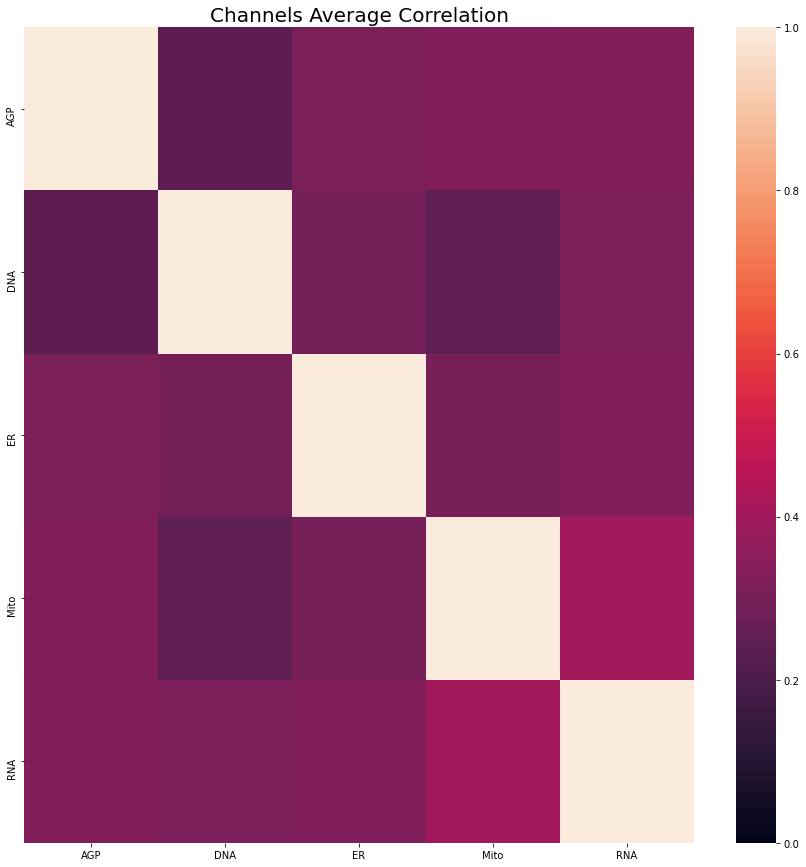

In [49]:
fig, ax = plt.subplots(figsize=(15,15), facecolor='white')
_ = sns.heatmap(data=corr_df, vmin=0, vmax=1, ax=ax)
ax.set_title('Channels Average Correlation', fontsize=20)

In [50]:
corr_df = pd.DataFrame()

for c1, c2 in chan_pairs:
    if 'DNA' in c1+c2:
        df = raw1to1_df.loc[[c.replace('?', c1) for c in col_names if 'Granularity' not in c], [c.replace('?', c2) for c in col_names if 'Granularity' not in c]]
    else:
        df = raw1to1_df.loc[[c.replace('?', c1) for c in col_names], [c.replace('?', c2) for c in col_names]]
        
    corr = np.diag(df).mean()
    corr_df.loc[c1, c2] = corr
    corr_df.loc[c2, c1] = corr

for c in cols.keys():
    if c != 'ALL':
        corr_df.loc[c, c] = 1

In [51]:
chans = [c for c in cols.keys() if c != 'ALL']
corr_df = corr_df.loc[chans, chans]

In [52]:
pd.Series(np.diag(df), index=[df.index, df.columns])

col1                                col2                             
Cells_Granularity_10_Mito           Cells_Granularity_10_RNA             0.183484
Cells_Granularity_11_Mito           Cells_Granularity_11_RNA             0.116440
Cells_Granularity_12_Mito           Cells_Granularity_12_RNA             0.199104
Cells_Granularity_13_Mito           Cells_Granularity_13_RNA             0.190913
Cells_Granularity_14_Mito           Cells_Granularity_14_RNA             0.219327
                                                                           ...   
Cells_Texture_SumVariance_Mito_3_0  Cells_Texture_SumVariance_RNA_3_0    0.386816
Cells_Texture_SumVariance_Mito_5_0  Cells_Texture_SumVariance_RNA_5_0    0.378833
Cells_Texture_Variance_Mito_10_0    Cells_Texture_Variance_RNA_10_0      0.372095
Cells_Texture_Variance_Mito_3_0     Cells_Texture_Variance_RNA_3_0       0.352629
Cells_Texture_Variance_Mito_5_0     Cells_Texture_Variance_RNA_5_0       0.323322
Length: 86, dtype: float64

Text(0.5, 1.0, 'Channels Average Correlation')

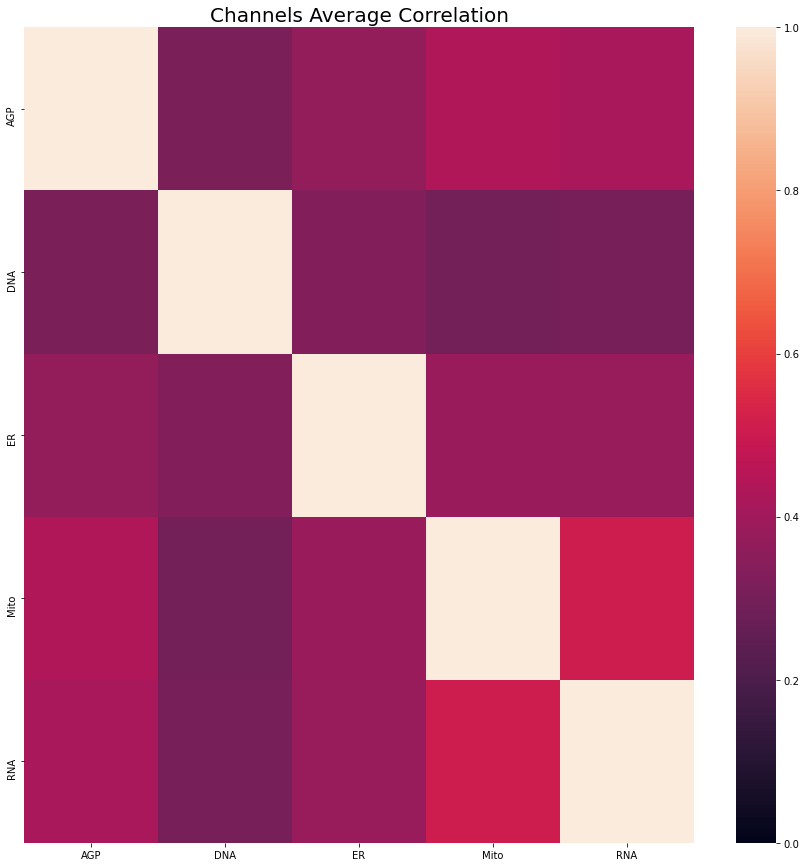

In [53]:
fig, ax = plt.subplots(figsize=(15,15), facecolor='white')
_ = sns.heatmap(data=corr_df, vmin=0, vmax=1, ax=ax)
ax.set_title('Channels Average Correlation', fontsize=20)